In [1]:
from typing import Union, Tuple, List

import numpy as np
import scipy.signal as sps
import matplotlib.pyplot as plt
import soundfile

### 1 Plot system properties

#### a)

In [2]:
def plot_pole_zero_diagram(
        system: Union[
            Tuple[List[float], List[float]],
            Tuple[List[float], List[float], float]
        ],
        color: str = 'k'
):
    """
    Plots a systems pole-zero-diagram.
    Marks poles or zeros at the same position with numbers

    :param system: A tuple defining the system either by (b-coefficients, a-coefficients) or (zeros, poles, gain)
    :param color: The color for plotting the data in a format accepted by matplotlib
    """

    figure, axes = plt.subplots(figsize=(4, 4))

    z, p, k = system if len(system) == 3 else sps.tf2zpk(*system)
    z, z_counts = np.unique(z, return_counts=True)
    p, p_counts = np.unique(p, return_counts=True)

    def plot_point(x, y, count, marker, fillstyle=None):
        axes.plot(x, y, marker, color=color, fillstyle=fillstyle)
        if count > 1:
            axes.annotate(
                str(count),
                xy=(x, y), xycoords='data',
                xytext=(3, 3), textcoords='offset points',
                color=color
            )

    for zero, zero_count in zip(z, z_counts):
        plot_point(np.real(zero), np.imag(zero), zero_count, marker='o', fillstyle='none')

    for pole, pole_count in zip(p, p_counts):
        plot_point(np.real(pole), np.imag(pole), pole_count, marker='x')

    # plot unit circe
    w = np.linspace(0, 2 * np.pi, 100)
    axes.plot(np.cos(w), np.sin(w), c=[.5, .5, .5])

    # center graph
    xmin, xmax, ymin, ymax = axes.axis()
    xmax = max(np.abs([xmin, xmax]))
    xmin = -xmax
    ymax = max(np.abs([ymin, ymax]))
    ymin = -ymax
    axes.axis((xmin, xmax, ymin, ymax))

    # draw lines through 0 for orientation
    axes.plot([0, 0], [ymin, ymax], color='k')
    axes.plot([xmin, xmax], [0, 0], color='k')

    axes.set_title('Poles and zeros')
    axes.set_xlabel(r'$ \Re(z) $')
    axes.set_ylabel(r'$ \Im(z) $')
    figure.gca().set_aspect('equal')
    figure.tight_layout()
    plt.show()

In [3]:
# todo: sample rate ist in hz und nicht in radiants
def plot_transfer_function(
        system: Union[
            Tuple[List[float], List[float]],
            Tuple[List[float], List[float], float]
        ],
        fs: float = 2 * np.pi,
        N: int = 2048,
        color: str = 'k'
):
    """
    Plots a systems magnitude response, phase response and group delay.
    Marks poles or zeros at the same position with numbers

    :param system: A tuple defining the system either by (b-coefficients, a-coefficients) or (zeros, poles, gain)
    :param fs: The sampling rate. Defaults to 2 * pi
    :param N: The number of frequencies for which the magnitude/phase response and group delay are calculated. Defaults to 2048
    :param color: The color for plotting the data in a format accepted by matplotlib
    """

    figure, axes_list = plt.subplots(nrows=3, figsize=(20/2.54, 20/2.54), sharex=True)

    b, a = system if len(system) == 2 else sps.zpk2tf(*system)

    f, H = sps.freqz(b, a, N, fs=fs)
    H_magnitude_db = 20 * np.log10(np.abs(H))
    H_angle = np.unwrap(np.angle(H))
    _, H_group_delay = sps.group_delay((b, a), 2048, fs=fs)

    for index, data, in enumerate(
            [(H_magnitude_db, 'Magnitude response', 'Magnitude in dB'),
             (H_angle, 'Phase response', 'Phase in radians'),
             (H_group_delay, 'Group delay', 'Group delay in samples')]):
        axes = axes_list[index]
        axes.plot(f, data[0], linestyle='solid', color=color)
        axes.set_xlim(1, fs / 2)
        axes.set_title(data[1])
        axes.set_ylabel(data[2])
        axes.grid(True)
        axes.set_xscale('log')

    max_frequency_exponent = np.floor(np.log10(fs / 2))
    frequency_ticks = np.floor(np.power(10, np.arange(1, max_frequency_exponent + 1))).astype(int)
    axes_list[2].set_xticks(frequency_ticks)
    axes_list[2].set_xticklabels(frequency_ticks)
    axes_list[2].set_xlabel('Frequency in Hz')
    plt.show()

In [4]:
def plot_system(
        system: Union[
            Tuple[List[float], List[float]],
            Tuple[List[float], List[float], float]
        ],
        fs: float = 2 * np.pi,
        N: int = 2048,
        color: str = 'k'
):
    """
    Plots a systems magnitude response, phase response, group delay and pole-zero-diagram

    :param system: A tuple defining the system either by (b-coefficients, a-coefficients) or (zeros, poles, gain)
    :param fs: The sampling rate. Defaults to 2 * pi
    :param N: The number of frequencies for which the magnitude/phase response and group delay are calculated. Defaults to 2048
    :param color: The color for plotting the data in a format accepted by matplotlib
    """

    plot_transfer_function(system, fs, N, color)
    plot_pole_zero_diagram(system, color)

#### b)

**System 1:**

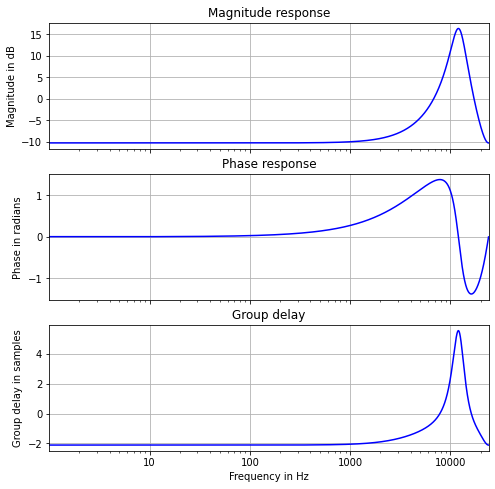

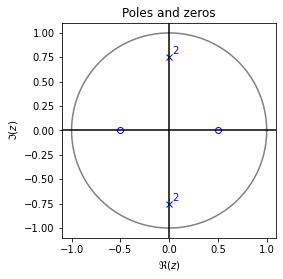

In [5]:
z = [0.5, -0.5]
p = [0.75j, -0.75j, 0.75j, -0.75j]
k = 1

plot_system((z, p, k), fs=48e3, color='blue')

**System 2:**

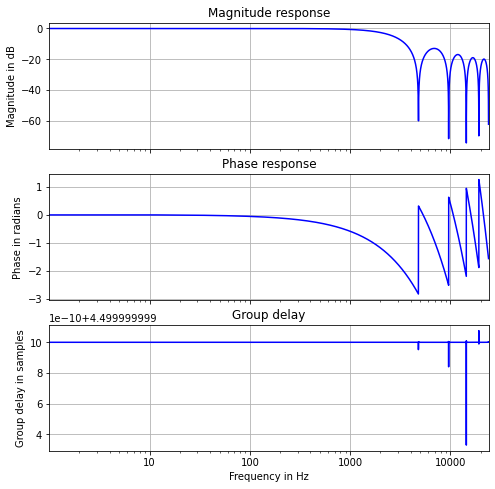

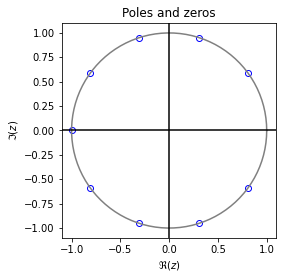

In [6]:
b = 0.1 * np.ones(10)
a = 1

plot_system((b, a), fs=48e3, color='blue')

### 2 z-Transfer functions

#### a)

Transfer functions of the systems:

$ H_{1}(x)=\frac{0.063-0.1008z^{-1}+0.04032z^{-2}}{1-1.9z^{-1}+0.9025z^{-2}} $ <br>

$ H_{2}(x)=\frac{1-0.9025z^{-2}}{1-0.64z^{-2}} $ <br>

$ H_{2}(x)=\frac{0.45+0.028125z^{-2}}{1+0.5625z^{-2}} $ <br>

filter coefficients:

In [7]:
b1 = [0.063, -0.1008, 0.04032]
a1 = [1, 1.9, 0.9025]
b2 = [1, 0, -0.9025]
a2 = [1, 0, -0.64]
b3 = [0.45, 0, 0.028125]
a3 = [1, 0, 0.5625]

#### b)

System 1:


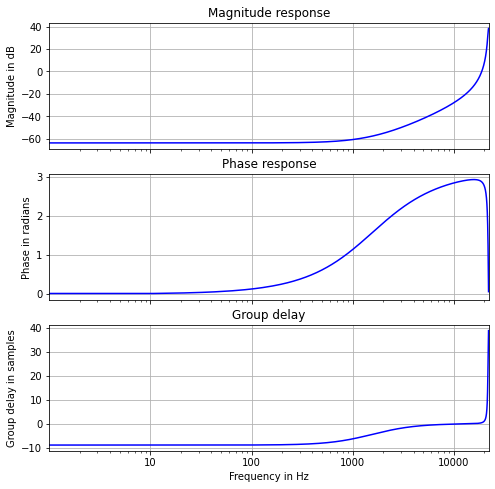

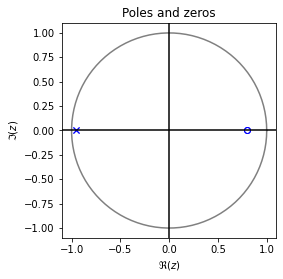

System 2:


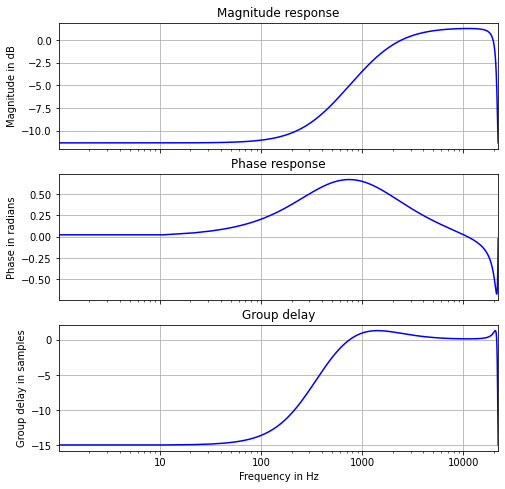

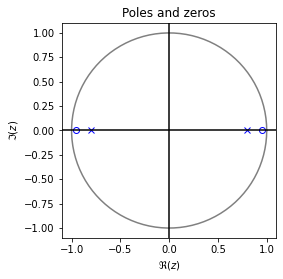

System 3:


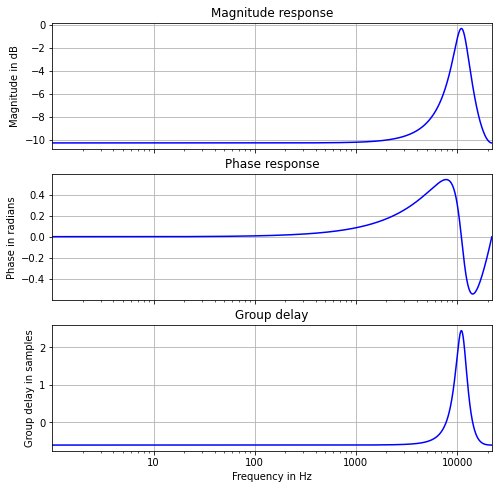

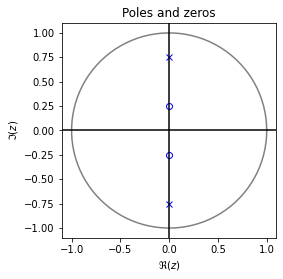

In [8]:
for index, system in enumerate([(b1, a1), (b2, a2), (b3, a3)]):
    print(f'System {index + 1}:')
    plot_system(system, fs=44100, color='blue')

## System 1
System 1 is a high pass filter. The passband gets amplified up to 40 dB at 20 kHz. The cut off frequency lies between 10 kHz and 20 kHz. The maximum attenuation is -60 dB.

## System 2
System 2 is also a high pass filter. Compared to filter 1 it has a more shallow slope and a lower cut off frequency. The maximum attenuation lies around -10 dB. The amplification in the passband is minimal. 

Where filter 1 has a more "resonant" characteristic, filter 2 is more of a shelfing filter. 

## System 3
System 3 is a bandpass filter. The peak frequency lies just above 10 kHz. The attenuation of the stopband is -10 dB. The steepnes of the slope lies between the steepness of filter 1 and 2.

# !!! pls check. Im deutschen stand Filter 3 ist bei 4 kHz. !!!



#### c)

The description of the filters fits to the sound of the filterd sound files.

In [9]:
# erstmal auskommentiert weil man sonst die datei immer hochladen muss
# samples, fs = soundfile.read('music.wav')
# 
# b1 = [0.063, -0.1008, 0.04032]
# a1 = [1, 1.9, 0.9025]
# b2 = [1, -1.9, 0.9025]
# a2 = [1, -1.6, 0.64]
# b3 = [0.45, 0, 0.028125]
# a3 = [1, 0, 0.5625]
# 
# for index, (b, a) in enumerate([(b1, a1), (b2, a2), (b3, a3)]):
#    filtered_samples = sps.lfilter(b, a, samples)
#    soundfile.write(f'music-filtered-{index + 1}.wav', filtered_samples, fs)

# 3 Incomplete z-Transfer functions 

#BITTE GEGENLESEN und deutsches entfernen


## System 1 to Allpass 

- System 1: zeros at zn = [0; 2 + 2j], a pole at zp = 0.25 - 0.25j.

- convert poles with complex conjugation to zeros -> p * 8 -> (2 - 2j)
- additional pole at zp = 0

## System 2 to stable system

- System 2: zeros at zn = [1;-1; j;-j], poles at zp = [-2; 2].

- all poles need to be in unity circle. --> four new zeros at origin 
Alle Polstellen im Einheitskreis -> 4 Neue Nullstellen bei 0


## System 3 to minimum phase system

- System 3: zeros at zn = [1 + 1j; 1 - 1j;-1 + 1j;-1 - 1j], poles at zp = [0.25j; -0.25j].

- poles and zeros in unity circle --> mirrow zeros outside of unity circle on real axis --> $\frac{1}{c^*}$

Pol- und Nullstellen in Einheitskreis -> spiegeln der Nullstellen außerhalb am Einheitskreis -> $\frac{1}{c^*}$


## system 4 to real valued impulse response

- System 4: zeros at zn = [0.25 + 0.25j; 0.25 - 0.25j], a pole at zp = 0.5j.

- zu sich komplex konj. Pol- und Nullstellen -> extra Polstelle = gegebene Polstelle komplex konjugiert

- to themself complex conjugated poles and zeros --> additional pole equal to complex conjugated given pole 

Solution in code below:

System 1:


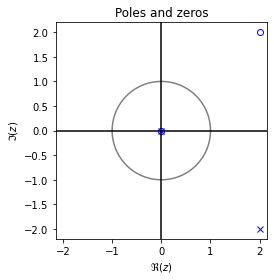

System 2:


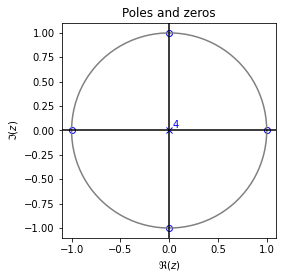

System 3:


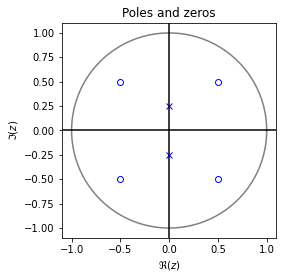

System 4:


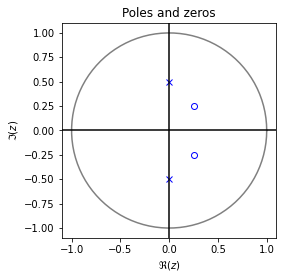

In [10]:
# todo
z1 = [0, 2+2j]  # Nullstellen 1. System
p1 = [0, 2-2j]  # Polstellen 1. System

z2 = [1, -1, 1j, -1j] # Nullstellen 2. System
p2 = [0, 0, 0, 0]

z3 = [1/(1-1j), 1/(1+1j), 1/(-1-1j), 1/(-1+1j)]
p3 = [0.25j, -0.25j] # immer gleich viele p und n ? -> wenn ja zwei extra polstellen bei 0

z4 = [0.25 + 0.25j, 0.25-0.25j]
p4 = [0.5j, -0.5j]

k = 1

for index, system in enumerate([(z1, p1, k), (z2, p2, k), (z3, p3, k), (z4, p4, k)]):
    print(f'System {index + 1}:')
    plot_pole_zero_diagram(system, color='blue')

### 4 Minimum Phase systems

##### a) Plot the pole-zero diagrams of the minimum phase system and the all-pass system that satisfy H(z) = Hmin(z) * Hap(z) without computing the corresponding gains k_min and k_ap.

*Zeros at:*
z = [2j, -2j, -2, 0.5j, -0.5j, -0.5]

*Poles at:*
p = [0.5j, -0.5j, -0.5, 0, 0, 0]

**Transfer function:**

$H(z)= \frac{(1-2jz^{-1})(1+2jz^{-1})(1+2z^{-1})}{z^{-3}}$


**Minimum phase system:**

$H_{min}(z)=\frac{(1+\frac{1}{2}jz^{-1})(1-\frac{1}{2}jz^{-1})(1+\frac{1}{2}z^{-1})}{z^{-3}}$

**All-pass system:**

$H_{ap}(z)=\frac{(1-2jz^{-1})(1+2jz^{-1})(1+2z^{-1})}{(1+\frac{1}{2}jz^{-1})(1-\frac{1}{2}jz^{-1})(1+\frac{1}{2}z^{-1})}$

**Plots:**

System:

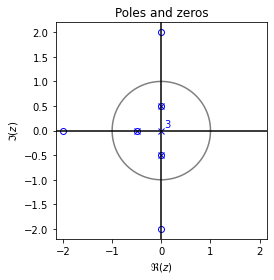

In [ ]:
z = [2j, -2j, -2, 0.5j, -0.5j, -0.5]
p = [0.5j, -0.5j, -0.5, 0, 0, 0]

plot_pole_zero_diagram((z, p, 1), color='blue')

Minimum phase system:

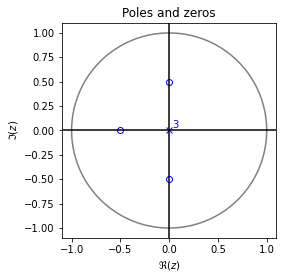

In [ ]:
z_min = [-0.5j, 0.5j, -0.5]
p_min = [0, 0, 0]

plot_pole_zero_diagram((z_min, p_min, 1), color='blue')

All-pass system:

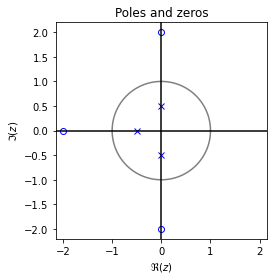

In [ ]:
z_ap = [2j, -2j, -2]
p_ap = [-0.5j, 0.5j, -0.5]

plot_pole_zero_diagram((z_ap, p_ap, 1), color='blue')

##### b) Plot |H(z)|, |Hmin(z)|, and |Hap(z)| in dB for −2.5 ≤ Re{z}, Im{z} ≤ 2.5. Use with the zeros ck and the roots dk. Determine kmin and kap to assure |H(z = ejω)| = |Hmin(z = ejω)| and |Hap(z = ejω)| = 1 (don’t do this analytically, use your results to get the values).

Gain

$k_{min}=8$ <br>

$k_{ap}=\frac{1}{8}$


so hab ich die Gains Berechnet:

![image.png](attachment:image.png)

Nicht Zähler sondern Nenner:

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
k = 1
k_min = 8
k_ap = 1 / 8

# todo

##### c) Plot |Hmin(z)| / |H(z)| in dB to check |H(z = ejω)| = |Hmin(z = ejω)|.

In [ ]:
# todo
# mit dem code von 1. Aufgabe